In [204]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [205]:
def column(m, c):
      return [m[i][c] for i in range(len(m))]
def row(m, r):
      return m[r][:]
def height(m):
      return len(m)
def width(m):
      return len(m[0])
    
# performs successive over relaxation
# modified from https://trinket.io/python/aea71b62f6
def sor(A, b, x0, w=1, tol=10e-10, max_iteration=100000):
    # augment matrix
    m = np.column_stack((A, b))
    n  = height(m)
    x1 = x0[:]
    for k in range(max_iteration):
        for i in range(n):
            s = sum(-m[i][j] * x1[j] for j in range(n) if i != j)
            x1[i] = w*(m[i][n]+s)/m[i][i] + (1-w)*x0[i]
        if all(abs(x1[i]-x0[i]) < tol for i in range(n)):
            return x1, k
        x0 = x1[:]
    return x1, max_iteration


In [206]:
# yields float values for a range
def frange(x, y, jump):
    while x <= y:
        yield round(x, 2)
        x += jump

# returns L, D, U where A = L + D + U
def LDU(A):
    L = np.tril(A, k=-1)
    U = A - np.tril(A)
    D = A-U-L
    return L, D, U

# calculates the iterations matrix for a given A and w
def Rsor(A, w):
    L, D, U = LDU(A)
    return np.linalg.inv(w*L + D).dot((1-w)*D-w*U)

# returns the spectral radius of A
def rho(A):
    v, __ = np.linalg.eig(A)
    for j in range(len(v)):
        v[j] = abs(v[j])
    return max(v)

In [207]:
A = [[2, -1, 0],[-1,2,-1],[0,-1,2]]
b = [[5],[-2],[2]]
x0 = [0,0,0]

In [208]:
x = list(frange(0.5, 1.8, 0.005))
y = [rho(Rsor(A, w)) for w in x]

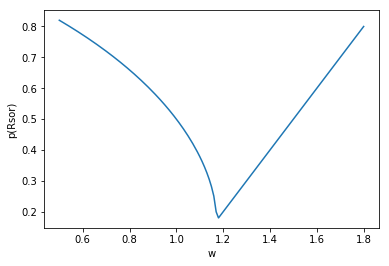

In [209]:
plt.plot(x, y)
plt.xlabel('w')
plt.ylabel('p(Rsor)')
plt.show()

In [210]:
wopt = x[y.index(min(y))]
print("wopt is", wopt)

wopt is 1.18


In [211]:
sor(A, b, x0, w=wopt, tol=10e-10)

([3.250000000117603, 1.5000000000445395, 1.7500000000148923], 14)

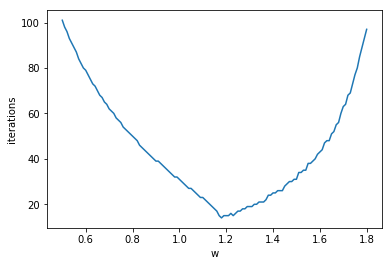

In [212]:
iterations = [sor(A, b, x0, w=w, tol=10e-10)[1] for w in x]
plt.plot(x, iterations)
plt.xlabel('w')
plt.ylabel('iterations')
plt.show()